In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
from matplotlib import style
import time
from time import gmtime, strftime
style.use('ggplot')

### First, we will import the sensor stationary sensor data

In [50]:
#Read in the data
acc = pd.read_csv('Acc_stationary.csv',low_memory=False)
#Read in Gyroscope data
gyro = pd.read_csv('Gyro_stationary.csv',low_memory=False)

In [42]:
acc['elapsed (s)'] = pd.to_numeric(acc['elapsed (s)'])
acc['x-axis (g)'] = pd.to_numeric(acc['x-axis (g)'])
acc['y-axis (g)'] = pd.to_numeric(acc['y-axis (g)'])
acc['z-axis (g)'] = pd.to_numeric(acc['z-axis (g)'])

gyro['elapsed (s)'] = pd.to_numeric(gyro['elapsed (s)'])
gyro['x-axis (deg/s)'] = pd.to_numeric(gyro['x-axis (deg/s)'])
gyro['y-axis (deg/s)'] = pd.to_numeric(gyro['y-axis (deg/s)'])
gyro['z-axis (deg/s)'] = pd.to_numeric(gyro['z-axis (deg/s)'])
acc.head()


,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1477768025222,2016-10-29T15.07.05.222,0.000000,-0.115234,0.034668,0.987305
1,1477768025241,2016-10-29T15.07.05.241,0.019043,-0.114258,0.035156,0.994141
2,1477768025262,2016-10-29T15.07.05.262,0.039551,-0.113281,0.033203,0.994141
3,1477768025281,2016-10-29T15.07.05.281,0.058594,-0.112793,0.032227,0.995605
4,1477768025301,2016-10-29T15.07.05.301,0.079102,-0.116211,0.034668,0.997070


In [52]:
acc.apply(pd.to_numeric, errors='ignore')
gyro.apply(pd.to_numeric, errors='ignore')

,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
0,1477768048841,2016-10-29T15.07.28.841,0.000000,0.183105,1.403809,-0.610352
1,1477768048860,2016-10-29T15.07.28.860,0.019043,0.183105,1.586914,-0.671387
2,1477768048880,2016-10-29T15.07.28.880,0.039551,0.183105,1.708984,-0.549316
3,1477768048901,2016-10-29T15.07.28.901,0.060059,0.183105,2.319336,-0.549316
4,1477768048921,2016-10-29T15.07.28.921,0.080566,0.183105,2.563477,-0.427246
5,1477768048942,2016-10-29T15.07.28.942,0.101074,0.244141,1.953125,-0.427246
6,1477768048962,2016-10-29T15.07.28.962,0.121582,0.244141,1.464844,-0.549316
7,1477768048982,2016-10-29T15.07.28.982,0.140625,0.244141,1.708984,-0.549316
8,1477768049002,2016-10-29T15.07.29.002,0.161133,0.183105,2.075195,-0.549316
9,1477768049023,2016-10-29T15.07.29.023,0.181641,0.183105,1.953125,-0.610352


In [4]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [53]:
gyro.head()

,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
0,1477768048841,2016-10-29T15.07.28.841,0.000000,0.183105,1.403809,-0.610352
1,1477768048860,2016-10-29T15.07.28.860,0.019043,0.183105,1.586914,-0.671387
2,1477768048880,2016-10-29T15.07.28.880,0.039551,0.183105,1.708984,-0.549316
3,1477768048901,2016-10-29T15.07.28.901,0.060059,0.183105,2.319336,-0.549316
4,1477768048921,2016-10-29T15.07.28.921,0.080566,0.183105,2.563477,-0.427246


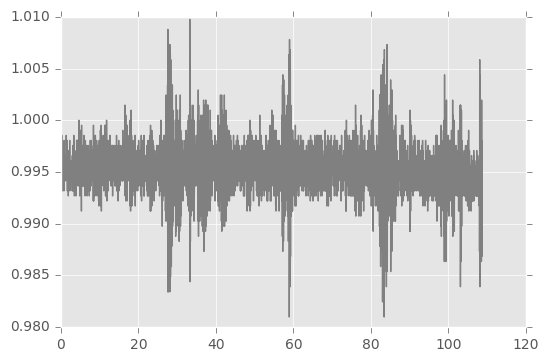

In [61]:
plt.ion()
plt.plot(acc['elapsed (s)'],acc['z-axis (g)'],color='0.5')
plt.show()

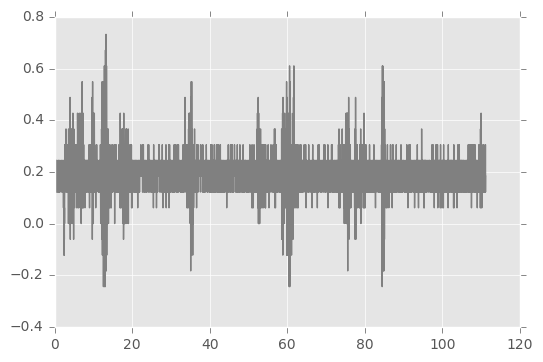

In [62]:
plt.plot((gyro['elapsed (s)']),gyro['x-axis (deg/s)'],color='0.5')
plt.show()

In [56]:
#the two tables don't start at the same time, so I am calculating the relative offset between the start times
#Once we have the offset, we can add the subsequent timestampts to find the times for each sample in the second
#table relative to the first
t1_start = acc['timestamp (-04:00)'][0].split('T')[1]
t2_start = gyro['timestamp (-04:00)'][0].split('T')[1]

def str2secs(s):
    h,m,s,ss = map(float,s.split('.')) 
    return h*3600+m*60 + s+0.001*ss

#"offset" contains the time difference between the start times of the first and second table
offset = str2secs(t2_start) - str2secs(t1_start)
print offset

23.619


In [57]:
gyro['time-offset'] = offset+gyro['elapsed (s)']

In [58]:
gyro.head()

,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),time-offset
0,1477768048841,2016-10-29T15.07.28.841,0.000000,0.183105,1.403809,-0.610352,23.619000
1,1477768048860,2016-10-29T15.07.28.860,0.019043,0.183105,1.586914,-0.671387,23.638043
2,1477768048880,2016-10-29T15.07.28.880,0.039551,0.183105,1.708984,-0.549316,23.658551
3,1477768048901,2016-10-29T15.07.28.901,0.060059,0.183105,2.319336,-0.549316,23.679059
4,1477768048921,2016-10-29T15.07.28.921,0.080566,0.183105,2.563477,-0.427246,23.699566


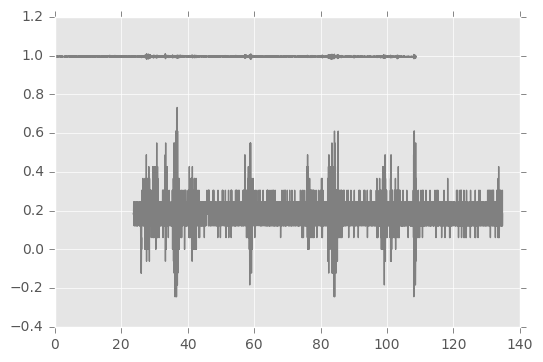

In [14]:
plt.plot(acc['elapsed (s)'],acc['z-axis (g)'],color='0.5')
plt.plot(gyro['time-offset'],gyro['x-axis (deg/s)'],color='0.5')
plt.show()

In [15]:
#Read in the data
acc1 = pd.read_csv('L_100.csv',low_memory=False)
#Read in Gyroscope data
acc2 = pd.read_csv('R_100.csv',low_memory=False)
acc1['elapsed (s)'] = pd.to_numeric(acc1['elapsed (s)'])
acc1['x-axis (g)'] = pd.to_numeric(acc1['x-axis (g)'])
acc1['y-axis (g)'] = pd.to_numeric(acc1['y-axis (g)'])
acc1['z-axis (g)'] = pd.to_numeric(acc1['z-axis (g)'])

acc2['elapsed (s)'] = pd.to_numeric(acc2['elapsed (s)'])
acc2['x-axis (g)'] = pd.to_numeric(acc2['x-axis (g)'])
acc2['y-axis (g)'] = pd.to_numeric(acc2['y-axis (g)'])
acc2['z-axis (g)'] = pd.to_numeric(acc2['z-axis (g)'])
acc1.head()

,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1478042378811,2016-11-01T19.19.38.811,0.000000,0.131348,0.043457,0.990234
1,1478042378832,2016-11-01T19.19.38.832,0.020508,0.131836,0.044434,0.998535
2,1478042378851,2016-11-01T19.19.38.851,0.039551,0.130859,0.044922,0.995605
3,1478042378871,2016-11-01T19.19.38.871,0.060059,0.130371,0.043945,0.997070
4,1478042378890,2016-11-01T19.19.38.890,0.079102,0.130859,0.042480,0.998047


In [16]:
acc2.head()

,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1478042379948,2016-11-01T19.19.39.948,0.000000,0.112793,-0.011719,0.977539
1,1478042379969,2016-11-01T19.19.39.969,0.020508,0.113281,-0.011719,0.985840
2,1478042379989,2016-11-01T19.19.39.989,0.041016,0.113281,-0.012207,0.981445
3,1478042380010,2016-11-01T19.19.40.010,0.061523,0.113281,-0.011719,0.981934
4,1478042380030,2016-11-01T19.19.40.030,0.082031,0.111816,-0.011230,0.982422


In [17]:
t1_start = acc1['timestamp (-04:00)'][0].split('T')[1]
t2_start = acc2['timestamp (-04:00)'][0].split('T')[1]
offset = str2secs(t2_start) - str2secs(t1_start)
print offset

1.137


In [23]:
acc2['time-offset'] = offset+acc2['elapsed (s)']
acc2.head()

,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g),time-offset
0,1478042379948,2016-11-01T19.19.39.948,0.000000,0.112793,-0.011719,0.977539,1.137000
1,1478042379969,2016-11-01T19.19.39.969,0.020508,0.113281,-0.011719,0.985840,1.157508
2,1478042379989,2016-11-01T19.19.39.989,0.041016,0.113281,-0.012207,0.981445,1.178016
3,1478042380010,2016-11-01T19.19.40.010,0.061523,0.113281,-0.011719,0.981934,1.198523
4,1478042380030,2016-11-01T19.19.40.030,0.082031,0.111816,-0.011230,0.982422,1.219031


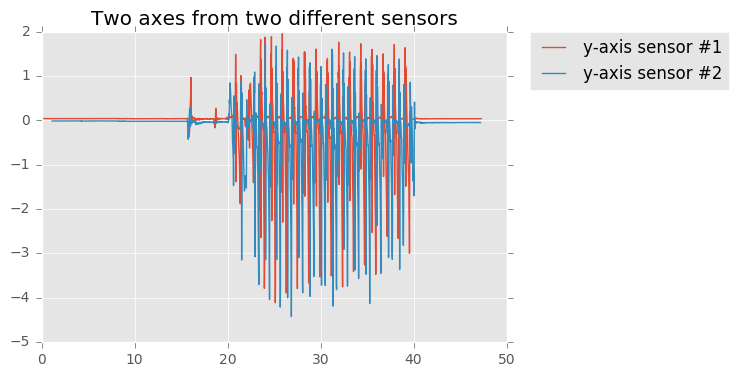

In [32]:
plt.title("Two axes from two different sensors")
plt.plot(acc1['elapsed (s)'],acc1['y-axis (g)'],label="y-axis sensor #1")
plt.plot(acc2['time-offset'],acc2['y-axis (g)'],label="y-axis sensor #2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [45]:
s = pd.Series(['1.0', '2', -3])
pd.to_numeric(s)
s = pd.Series(['apple', '1.0', '2', -3])



,epoc (ms),timestamp (-04:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1477768025222,2016-10-29T15.07.05.222,0.000000,-0.115234,0.034668,0.987305
1,1477768025241,2016-10-29T15.07.05.241,0.019043,-0.114258,0.035156,0.994141
2,1477768025262,2016-10-29T15.07.05.262,0.039551,-0.113281,0.033203,0.994141
3,1477768025281,2016-10-29T15.07.05.281,0.058594,-0.112793,0.032227,0.995605
4,1477768025301,2016-10-29T15.07.05.301,0.079102,-0.116211,0.034668,0.997070
5,1477768025322,2016-10-29T15.07.05.322,0.099609,-0.114746,0.035156,0.994629
6,1477768025341,2016-10-29T15.07.05.341,0.118652,-0.116211,0.034668,0.994629
7,1477768025361,2016-10-29T15.07.05.361,0.139160,-0.114746,0.032227,0.995117
8,1477768025382,2016-10-29T15.07.05.382,0.159668,-0.113281,0.031738,0.997070
9,1477768025401,2016-10-29T15.07.05.401,0.178711,-0.114258,0.032227,0.995117


In [46]:
t1_start = acc['timestamp (-04:00)'][0].split('T')[1]
t2_start = acc['timestamp (-04:00)'][0].split('T')[1]

def str2secs(s):
    h,m,s,ss = map(float,s.split('.')) 
    return h*3600+m*60 + s+0.001*ss

#"offset" contains the time difference between the start times of the first and second table
offset = str2secs(t2_start) - str2secs(t1_start)
print offset

0.0
